<a href="https://colab.research.google.com/github/marrs-lab/ocean_color/blob/main/processing_olci_data_for_figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processing Sentinel-3 OLCI Imagery into Chlorophyll-a



In [6]:
!pip install cartopy

     |████████████████████████████████| 10.8 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 42.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516289 sha256=d34ba4a39d493ba623bddb86317d39dda1b245608a36c3006841ad07dc5c3521
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [7]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import xarray as xr
import cartopy.crs as crs

Pull in all the imagery via xarray

In [15]:
#open dataset in xarray
nc_chl = xr.open_dataset('chl_oc4me_haifa_130821.nc') #path to chlorophyll file 

n_coord =xr.open_dataset('geo_coordinates_haifa_130821.nc') #path to coordinates file

ds_grid = [[nc_chl], [n_coord]]

combined = xr.combine_nested(ds_grid, concat_dim=[None, None]) 
combined #dataset with all data but not recognizing coordinates

olci_ds = combined.rename({'latitude': 'lat', 'longitude': 'lon'}).set_coords(['lon', 'lat']) #dataset recognizing coordinates as coordinates
# this chla product is log transformed
olci_ds['chl_norm'] = 10**olci_ds.CHL_OC4ME
olci_ds 

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Coordinates:
    lat            (rows, columns) float64 ...
    lon            (rows, columns) float64 ...
Dimensions without coordinates: columns, rows
Data variables:
    CHL_OC4ME      (rows, columns) float32 nan nan nan nan ... nan nan nan nan
    CHL_OC4ME_err  (rows, columns) float32 ...
    altitude       (rows, columns) float32 ...
    chl_norm       (rows, columns) float32 nan nan nan nan ... nan nan nan nan

In [20]:

olci_ds.chl_norm.shape

(4091, 4865)

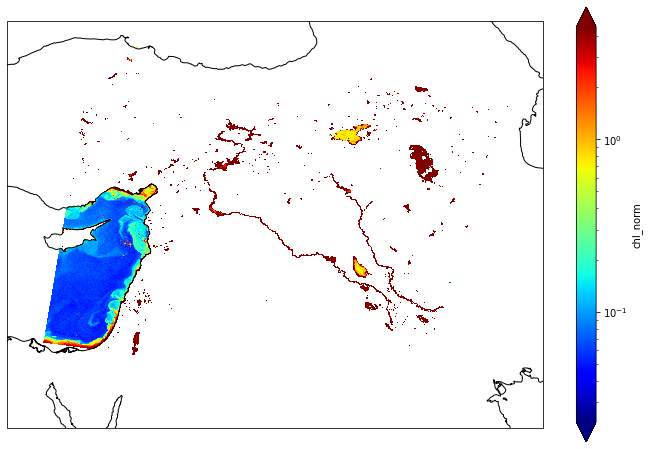

In [27]:


import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')

olci_ds.chl_norm[:,:].plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.023, vmax=4.5), cmap='jet')
# fig.savefig('olci_chla_sept0614.png',dpi=400)
plt.show()

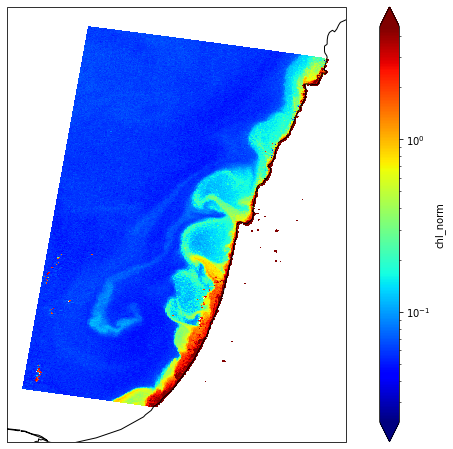

In [37]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')

olci_ds.chl_norm[2900:-100,500:1150].plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.023, vmax=4.5), cmap='jet')
# fig.savefig('olci_chla_sept0614.png',dpi=400)
plt.show()

In [ ]:


import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')

olci_ds.chl_norm[1500:3500,:1500].plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.023, vmax=4.5), cmap='jet')
# fig.savefig('olci_chla_sept0614.png',dpi=400)
plt.show()

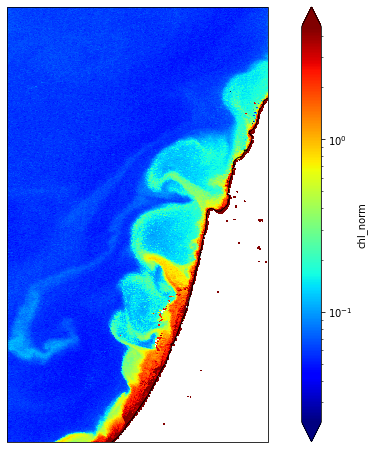

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(31.5,34)
ax.set_xlim(33.8,35.3)
olci_ds.chl_norm.plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.023, vmax=4.5), cmap='jet')
# fig.savefig('olci_chla_sept0614.png',dpi=400)
plt.show()

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(31.5,34)
ax.set_xlim(34,35.5)
olci_ds.chl_norm.plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.023, vmax=4.5), cmap='jet')
# fig.savefig('olci_chla_sept0614.png',dpi=400)
plt.show()

<xarray.Dataset>
Dimensions:        (columns: 4865, rows: 4091)
Coordinates:
    lat            (rows, columns) float64 ...
    lon            (rows, columns) float64 ...
Dimensions without coordinates: columns, rows
Data variables:
    CHL_OC4ME      (rows, columns) float32 nan nan nan nan ... nan nan nan nan
    CHL_OC4ME_err  (rows, columns) float32 ...
    altitude       (rows, columns) float32 ...
    chl_norm       (rows, columns) float32 nan nan nan nan ... nan nan nan nan

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
ax.set_ylim(31.5,34)
ax.set_xlim(34,35.5)
olci_ds.chl_norm.plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.023, vmax=4.5), cmap='jet')
# fig.savefig('olci_chla_sept0614.png',dpi=400)
plt.show()

In [ ]:
np.nanmedian((band2.values[0,4500:6700,1400:5500]/band3.values[0,4500:6700,1400:5500]))

2.1894273127753303

(array([2.904915e+06, 2.457270e+06, 7.397320e+05, 2.111036e+06,
        8.034220e+05, 1.880000e+02, 9.100000e+01, 2.800000e+01,
        6.000000e+00, 2.000000e+00]),
 array([0.06138614, 0.31320671, 0.56502728, 0.81684785, 1.06866842,
        1.32048899, 1.57230956, 1.82413013, 2.0759507 , 2.32777127,
        2.57959184]),
 <a list of 10 Patch objects>)

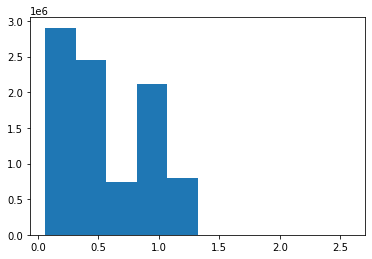

In [ ]:
plt.hist((band3.values[0,4500:6700,1400:5500]/band2.values[0,4500:6700,1400:5500]).flatten())

In [142]:
cut_img = olci_ds.chl_norm[2900:-100,500:1150]
cut_img

<xarray.DataArray 'chl_norm' (rows: 1091, columns: 650)>
array([[0.06355498, 0.06129168, 0.06129168, ..., 0.        , 0.        ,
        0.        ],
       [0.06590185, 0.06129168, 0.06129168, ..., 0.        , 0.        ,
        0.        ],
       [0.06590185, 0.0683354 , 0.06590185, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06129168, 0.06129168, 0.06129168, ..., 0.        , 0.        ,
        0.        ],
       [0.06129168, 0.06129168, 0.06129168, ..., 0.        , 0.        ,
        0.        ],
       [0.0683354 , 0.0683354 , 0.0683354 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    lat      (rows, columns) float64 ...
    lon      (rows, columns) float64 ...
Dimensions without coordinates: rows, columns

In [118]:
np.nanmax(cut_img)

100.0

In [134]:
from scipy.interpolate import NearestNDInterpolator

data = cut_img.values
mask = np.where(~(data == 0))
interp = NearestNDInterpolator(np.transpose(mask), data[mask])
image_result = interp(*np.indices(data.shape))

In [129]:

image_result[-1,-1], image_result[0,0]

(10.18296, 0.06355498)

In [133]:

image_result

nan

In [139]:
image_result[image_result > 5] = np.nan

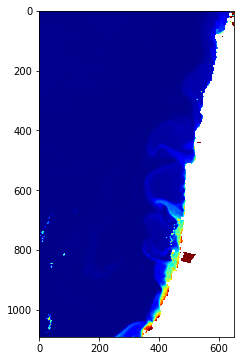

In [140]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(image_result,vmin=0.02, vmax=3.5, cmap='jet')

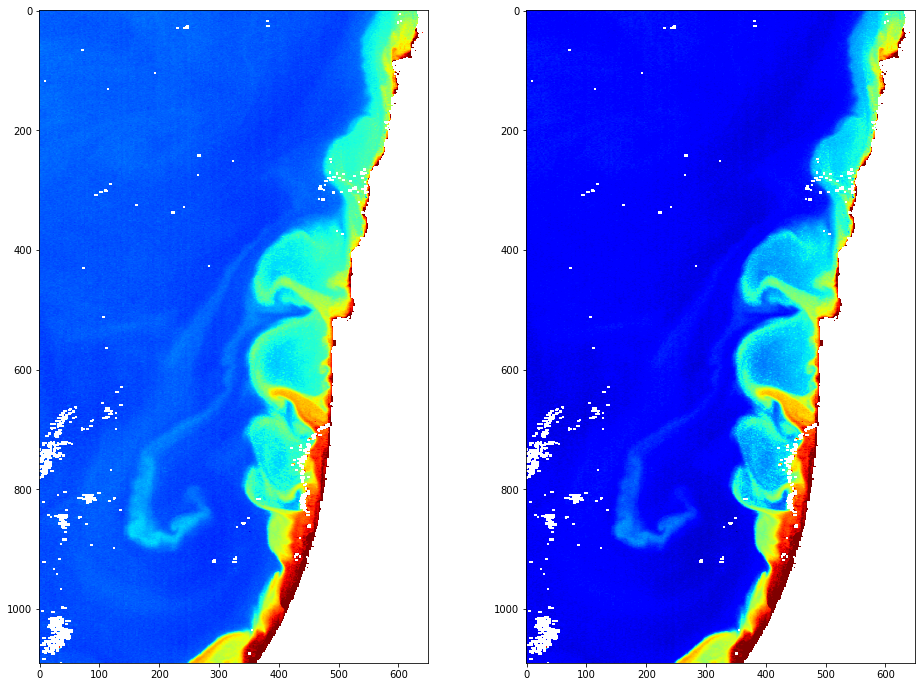

In [67]:
from matplotlib.colors import LogNorm
fig,ax=plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(cut_img, interpolation=None, norm=LogNorm(vmin=0.02, vmax=3.5), cmap='jet')
ax[1].imshow(cut_img, interpolation=None, norm=LogNorm(vmin=0.035, vmax=3), cmap='jet')

In [155]:

olci_ds.chl_norm[3100:-500,500:1150].lon.min()

<xarray.DataArray 'lon' ()>
array(33.470631)

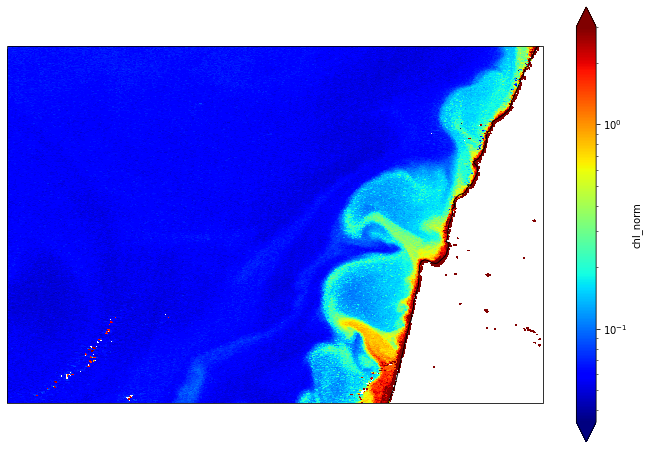

In [165]:
fig, ax = plt.subplots(1,1, figsize=(12,8), subplot_kw=dict(projection=crs.PlateCarree()))
ax.coastlines(resolution='10m')
# ax.imshow(cut_img, interpolation=None, norm=LogNorm(vmin=0.035, vmax=3), cmap='jet')
olci_ds.chl_norm[2800:-200,300:1400].plot(ax=ax,x='lon', y='lat', norm=LogNorm(vmin=0.035, vmax=3), cmap='jet')
ax.set_ylim(32.2,33.8)
ax.set_xlim(33.1,35.5)
fig.savefig('olci_chla_haifa_130822.png',dpi=600)



In [ ]:
mask = np.isnan(cut_img)
cut_img[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), cut_img[~mask])

In [111]:
resampled_img = np.zeros(cut_img.shape)
resampled_img.shape

(1091, 650)

In [112]:
cut_img.shape

(1091, 650)

In [113]:
1091/3

363.6666666666667

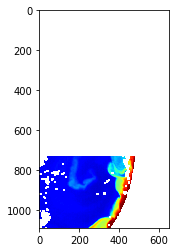

In [114]:
resampled_img[363*2:,:] = cut_img[363*2:,:]
plt.imshow(resampled_img, interpolation=None, norm=LogNorm(vmin=0.035, vmax=3), cmap='jet')

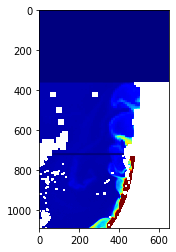

In [115]:
import skimage.measure
import cv2
new_array = skimage.measure.block_reduce(cut_img[363:363*2,:], (10,10), np.median)
res = cv2.resize(new_array, dsize=cut_img[363:363*2,:].T.shape, interpolation=cv2.INTER_AREA)
resampled_img[363:363*2,:] = res
plt.imshow(resampled_img,vmin=0, vmax=1.3, cmap='jet')

In [ ]:

1800/300, 4500/300

(6.0, 15.0)

In [ ]:

cut_img.shape

(1800, 4500)

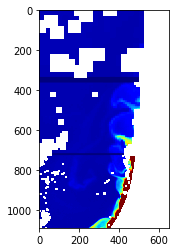

In [116]:
new_array = skimage.measure.block_reduce(cut_img[:363,:], (30,30), np.median)
res = cv2.resize(new_array, dsize=cut_img[:363,:].T.shape, interpolation=cv2.INTER_AREA)
resampled_img[:363,:] = res
plt.imshow(resampled_img,vmin=0, vmax=1.3, cmap='jet')

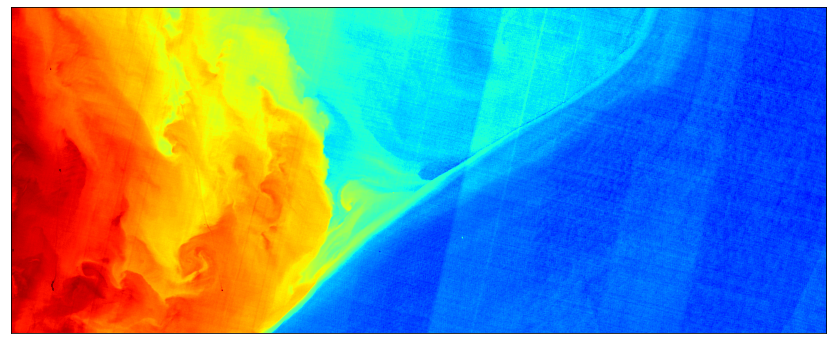

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(cut_img,vmin=0.0, vmax=1.25, cmap='jet')
# ax.axvline(1500,color='black')
# ax.axvline(3000,color='black')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('landsat_aq_ref_front_img_notscaled.png',dpi=600)

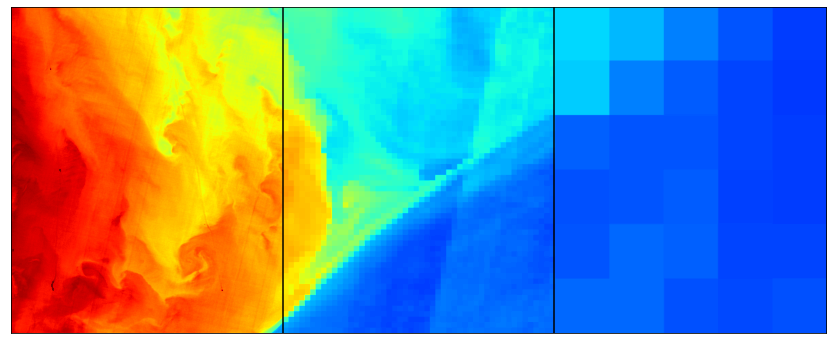

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
ax.imshow(resampled_img,vmin=0.0, vmax=1.25, cmap='jet')
ax.axvline(1500,color='black')
ax.axvline(3000,color='black')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('landsat_aq_ref_front_img_scaled.png',dpi=600)

In [ ]:

30*20

600

(1000, 800)


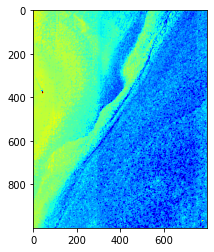

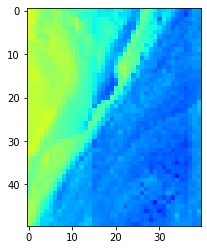

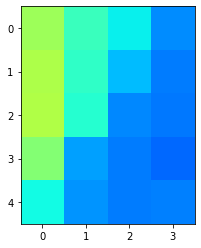

In [ ]:
import numpy as np
import skimage.measure

your_array = band1_cut.values[:,800:1600]
print(your_array.shape)
plt.imshow(your_array, vmin=7350, vmax=8800, cmap='jet')
plt.show()
new_array = skimage.measure.block_reduce(your_array, (20,20), np.median)
plt.imshow(new_array, vmin=7350, vmax=8800, cmap='jet')
plt.show()
new_array = skimage.measure.block_reduce(your_array, (200,200), np.median)
plt.imshow(new_array, vmin=7350, vmax=8800, cmap='jet')
plt.show()

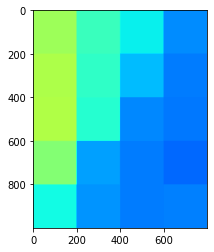

In [ ]:
import cv2
import numpy as np

In [ ]:

resampled_img[:,8000:16000] = band1_cut.values[:,8000:1600]

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
band1_cut.plot(vmin=7000, vmax=9000, cmap='jet',ax=ax)

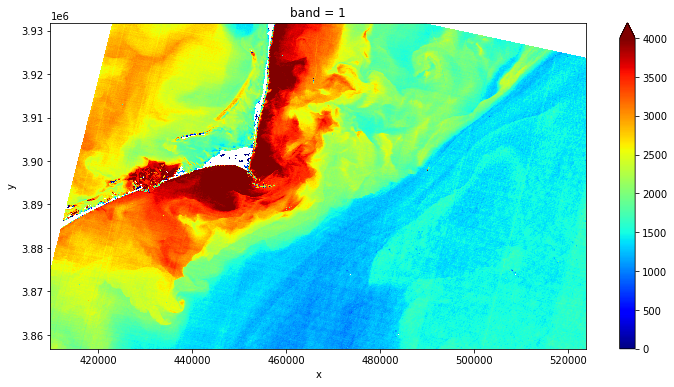

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
band1.plot(vmin=0, vmax=4000, cmap='jet',ax=ax)

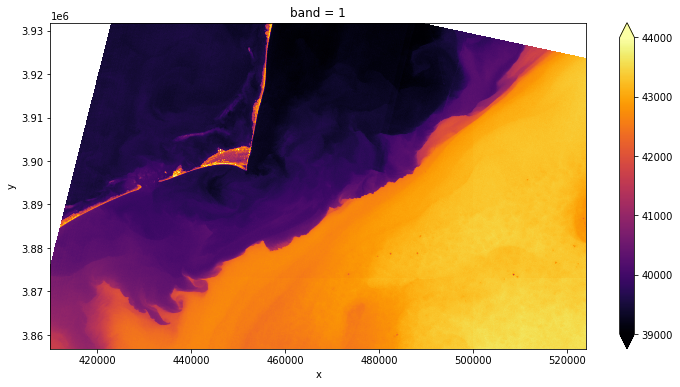

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
therm.plot(vmin=39000, vmax=44000, cmap='inferno',ax=ax)

Rescaling thermal band to TOA brightness temp using values from the metadata


In [ ]:
therm = (therm*0.0003342)+0.1

In [ ]:
therm

<xarray.DataArray (y: 2500, x: 3800)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [14.0237746, 14.0237746, 14.0247772, ..., 14.6667754, 14.6691148,
        14.6704516],
       [14.0267824, 14.026114 , 14.0267824, ..., 14.664436 , 14.666107 ,
        14.667778 ],
       [14.0291218, 14.0284534, 14.0284534, ..., 14.662765 , 14.6641018,
        14.6651044]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05

In [ ]:
# unsure if I need to do this solar angle calculation but it is accouting for sun elevation
# don't believe so...
import math
#therm = therm / np.sin(math.radians(45.21160346))

In [ ]:
# continued scaling from metadata
# K1_CONSTANT_BAND_10 = 774.8853
k1 = 774.8853
# K2_CONSTANT_BAND_10 = 1321.0789
k2 = 1321.0789
therm = k2 / np.log((k1 / therm) + 1)

In [ ]:
# keeping it in Kelvin degrees C is:
therm - 273.15

<xarray.DataArray (y: 2500, x: 3800)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [54.66952013, 54.66952013, 54.67523236, ..., 58.2896213 ,
        58.30263762, 58.31007503],
       [54.68665618, 54.68284833, 54.68665618, ..., 58.27660388,
        58.28590215, 58.29519986],
       [54.69998287, 54.69617536, 54.69617536, ..., 58.26730506,
        58.27474416, 58.28032326]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.101e+05 4.101e+05 4.102e+05 ... 5.24e+05 5.241e+05

(array([1.675000e+03, 6.601630e+05, 3.800374e+06, 2.035899e+06,
        1.394307e+06, 5.959730e+05, 3.016050e+05, 9.649000e+03,
        1.140000e+02, 4.400000e+01]),
 array([   0. ,  628.3, 1256.6, 1884.9, 2513.2, 3141.5, 3769.8, 4398.1,
        5026.4, 5654.7, 6283. ]),
 <a list of 10 Patch objects>)

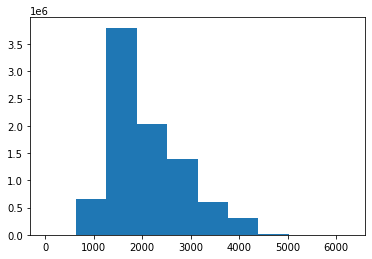

In [ ]:
plt.hist(np.array(band1).flatten())

(array([2.212634e+06, 1.619520e+06, 6.820710e+05, 2.512780e+05,
        2.089960e+05, 9.331060e+05, 1.973740e+06, 1.049780e+06,
        2.240000e+02, 1.100000e+01]),
 array([322.55775043, 323.7541691 , 324.95058777, 326.14700644,
        327.34342511, 328.53984378, 329.73626245, 330.93268112,
        332.12909979, 333.32551846, 334.52193713]),
 <a list of 10 Patch objects>)

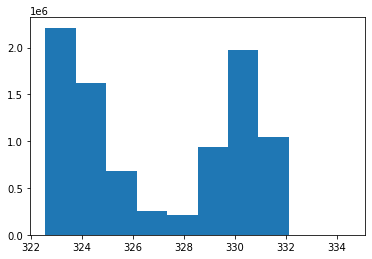

In [ ]:
plt.hist(np.array(therm).flatten())

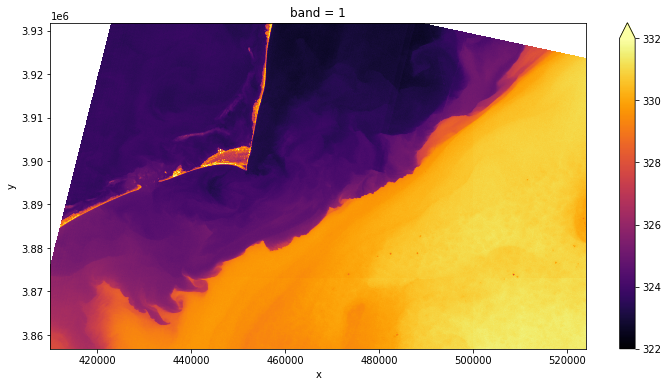

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
therm.plot(vmin=322, vmax=332, cmap='inferno',ax=ax)

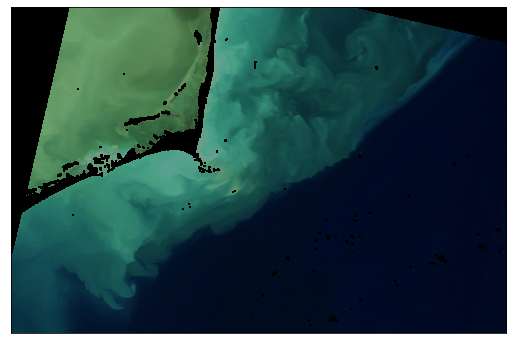

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.imshow(np.array((band4.T,band3.T,band2.T)).T/10000)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('rgb_img.png',dpi=300)

Run the NASA chlorophyll algorithm using algorithm coefficients for L8 from https://oceancolor.gsfc.nasa.gov/atbd/chlor_a/


In [ ]:
# get the max blue band
mbr = np.maximum(band1, band2)
mbr.shape

(2500, 3800)

In [ ]:
# landsat 8 coefs
a0 = 0.2412
a1 = -2.0546
a2 = 1.1776
a3 = -0.5538
a4 = -0.4570


log10chl = a0 + a1 * (np.log10(mbr / band3)) \
    + a2 * (np.log10(mbr / band3))**2 \
        + a3 * (np.log10(mbr / band3))**3 \
            + a4 * (np.log10(mbr / band3))**4

oc3m = np.power(10, log10chl)

/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [ ]:
oc3m

<xarray.DataArray (y: 2500, x: 3800)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.86099308, 0.85626201, 0.85457658, ..., 0.16582573, 0.16943841,
        0.16258664],
       [0.86762766, 0.86262477, 0.8591536 , ..., 0.17234262, 0.17689166,
        0.16760315],
       [0.8683062 , 0.8624288 , 0.86098927, ..., 0.17344878, 0.17991719,
        0.17146281]])
Coordinates:
    band     int64 1
  * y        (y) float64 3.932e+06 3.932e+06 3.932e+06 ... 3.857e+06 3.857e+06
  * x        (x) float64 4.098e+05 4.098e+05 4.099e+05 ... 5.237e+05 5.238e+05

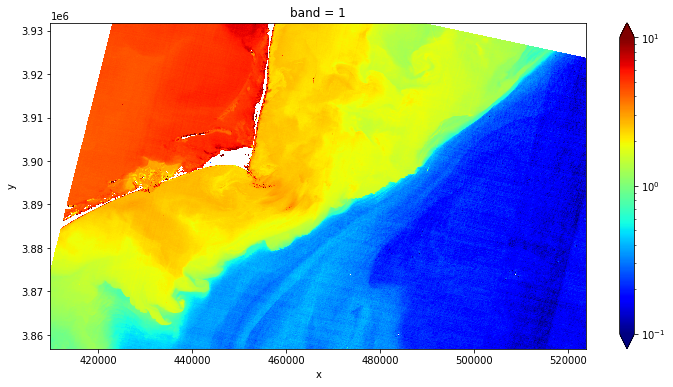

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
oc3m.plot(norm=LogNorm(vmin=0.1, vmax=10), cmap='jet',ax=ax)

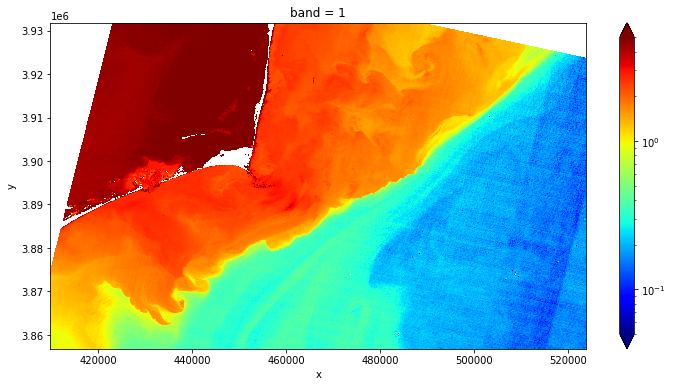

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
oc3m.plot(norm=LogNorm(vmin=0.05, vmax=5), cmap='jet',ax=ax)
fig.savefig('chla_wall.png',dpi=300)

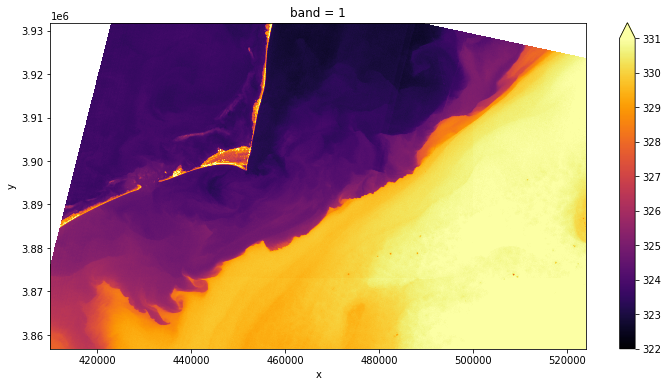

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
therm.plot(ax=ax, cmap='inferno',vmin=322, vmax=331)
fig.savefig('thermal_wall.png',dpi=300)

In [ ]:
oc3m.shape

(2500, 3800)

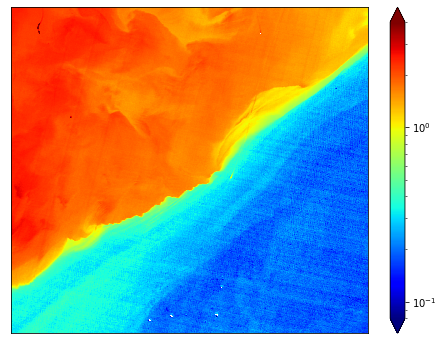

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
oc3m[350:1850,1750:3250].plot(norm=LogNorm(vmin=0.08, vmax=4), cmap='jet',ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
fig.savefig('chla_wall_zoom_gridless.png',dpi=300, transparent=True)

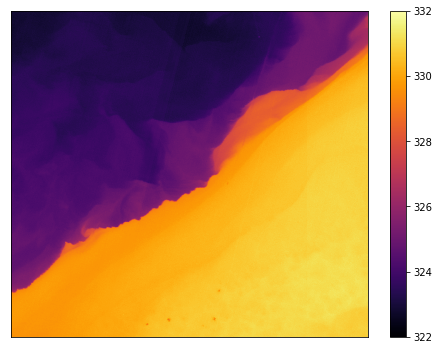

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
therm[350:1850,1750:3250].plot(ax=ax, cmap='inferno',vmin=322, vmax=332)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("")
ax.set_ylabel("")
ax.set_xlabel("")
fig.savefig('thermal_wall_zoom_gridless.png',dpi=300, transparent=True)